# Phase 2: Find Processing Techniques
## Iteration 1: Train and Visualize Custom CNN Models with Techniques Groups 
### Import Libraries and Scripts

In [6]:
%reload_ext autoreload
%autoreload 2

In [2]:
# import functions and classes for model
from Utils.preporcessing_utils import data_loading 
from Utils.preporcessing_utils import labels_encoding
from Utils.preporcessing_utils import split_data
from Utils.preporcessing_utils import ablation
from Utils.run_model_utils import run_model

In [3]:
# import functions and classes for visualization
from Utils.visualizations_utils import Visualization

### Data Preparation and Basic Preprocessing

In [4]:
# Loads data
train_df, test_df = data_loading("train_full.csv", "test_full.csv")

In [5]:
# Create dataframe and transform(encodes) pathology labels
train_df, test_df = labels_encoding(train_df, test_df)

In [6]:
train_df.columns

Index(['image_id', 'image_type', 'image_path', 'series_uid', 'subject_id',
       'study_uid', 'breast_density', 'breast_side', 'image_view',
       'abnormality_type', 'pathology', 'split', 'label'],
      dtype='object')

In [7]:
# Split data
train_data, val_data, test_data = split_data(train_df, test_df, 0.11)

Train set: 1889 cases, 70.35 %
Validation set: 234 cases, 8.72 %
Test set: 562 cases, 20.93 %


### Create Preprocessing Groups by Using Ablation

In [8]:
# create groups using ablation
options = ['apply_background_removal',
           'apply_crop',
           'apply_noise_reduction',
           'apply_contrast_enhancement',
           'apply_edge_enhancement',
           'apply_lbp_texturizer']

In [9]:
# create group of techniques to try
techniques_groups = ablation(options)

In [10]:
techniques_groups["Baseline Basic Preporcessing"]

{'apply_background_removal': False,
 'apply_crop': False,
 'apply_noise_reduction': False,
 'apply_contrast_enhancement': False,
 'apply_edge_enhancement': False,
 'apply_lbp_texturizer': False}

### Baseline model with ImageGenerator
This models uses the custom CNN with 10 epochs and the tf.ImageDataGenerator image iterator. <br>
The preprocessing was done Using the ImageGenerator during training. <br><br> 

#### Training 
The following model call will not run because it is not connected the image iterator funtion anymore becaue the function was updated. <br> 
This output was kept for reference only. 
If needed, please see **run_model_utils.py** for running instructions.  

In [12]:
# runs baseline model with an image dataset generator 
run_model((train_data, val_data, test_data), techniques_groups, epochs=10, change="Baseline(tf.ImageDataGenerator)")

Training Custom10 - Baseline Basic Preporcessing - Baseline(tf.ImageDataGenerator)
Found 1889 validated image filenames.
Found 234 validated image filenames.
Found 562 validated image filenames.


I0000 00:00:1756665577.419168   33308 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1756665588.778667   33462 service.cc:148] XLA service 0x739a240099a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756665588.778734   33462 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-08-31 14:39:48.797362: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756665588.887976   33462 cuda_dnn.cc:529] Loaded cuDNN version 90501
E0000 00:00:1756665591.911711   33462 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1756665592.022091   33462 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 1/60 ━━━━━━━━━━━━━━━━━━━━ 9:03 9s/step - accuracy: 0.5000 - loss: 0.6927

I0000 00:00:1756665593.272752   33462 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 305s 5s/step - accuracy: 0.5005 - loss: 0.6944 - val_accuracy: 0.5171 - val_loss: 0.6937
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 294s 5s/step - accuracy: 0.5577 - loss: 0.6844 - val_accuracy: 0.4829 - val_loss: 0.6928
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.5870 - loss: 0.6787 - val_accuracy: 0.5556 - val_loss: 0.6932
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.5856 - loss: 0.6661 - val_accuracy: 0.5256 - val_loss: 0.6838
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.5976 - loss: 0.6517 - val_accuracy: 0.5342 - val_loss: 0.6886
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 274s 5s/step - accuracy: 0.6046 - loss: 0.6471 - val_accuracy: 0.5171 - val_loss: 0.6895
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.6418 - loss: 0.6359 - val_accuracy: 0.5342 - val_loss: 0.6880
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.6388 - loss: 0.6237 - val_accuracy: 0.5299 - val_loss: 0.

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 0.5142 - loss: 0.6930 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.5133 - loss: 0.6931 - val_accuracy: 0.5171 - val_loss: 0.6928
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 284s 5s/step - accuracy: 0.4939 - loss: 0.6933 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 275s 5s/step - accuracy: 0.5137 - loss: 0.6931 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 274s 5s/step - accuracy: 0.5139 - loss: 0.6931 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.5306 - loss: 0.6919 - val_accuracy: 0.5171 - val_loss: 0.6929
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 283s 5s/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5171 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 322s 5s/step - accuracy: 0.5357 - loss: 0.6929 - val_accuracy: 0.5171 - val_loss: 0.6925
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 318s 5s/step - accuracy: 0.5192 - loss: 0.6926 - val_accuracy: 0.5171 - val_loss: 0.6924
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 318s 5s/step - accuracy: 0.5188 - loss: 0.6925 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step - accuracy: 0.5273 - loss: 0.6928 - val_accuracy: 0.5385 - val_loss: 0.6920
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.5549 - loss: 0.6906 - val_accuracy: 0.5385 - val_loss: 0.6911
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 321s 5s/step - accuracy: 0.5447 - loss: 0.6890 - val_accuracy: 0.5470 - val_loss: 0.6902
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 318s 5s/step - accuracy: 0.5715 - loss: 0.6829 - val_accuracy: 0.5385 - val_loss: 0.6909
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 317s 5s/step - accuracy: 0.5711 - loss: 0.6790 - val_accuracy: 0.5171 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.4780 - loss: 0.6932 - val_accuracy: 0.5171 - val_loss: 0.6931
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.5141 - loss: 0.6930 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.5071 - loss: 0.6930 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 314s 5s/step - accuracy: 0.5166 - loss: 0.6927 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 308s 5s/step - accuracy: 0.4996 - loss: 0.6945 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.5092 - loss: 0.6930 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.5028 - loss: 0.6933 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.5192 - loss: 0.6925 - val_accuracy: 0.5171 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.5202 - loss: 0.6935 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.5305 - loss: 0.6922 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 305s 5s/step - accuracy: 0.5254 - loss: 0.6920 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 305s 5s/step - accuracy: 0.5422 - loss: 0.6906 - val_accuracy: 0.5171 - val_loss: 0.6931
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 284s 5s/step - accuracy: 0.5264 - loss: 0.6930 - val_accuracy: 0.5171 - val_loss: 0.6929
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 0.5343 - loss: 0.6926 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.5184 - loss: 0.6927 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 300s 5s/step - accuracy: 0.5022 - loss: 0.6933 - val_accuracy: 0.5171 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 297s 5s/step - accuracy: 0.5272 - loss: 0.6929 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.5092 - loss: 0.6932 - val_accuracy: 0.5171 - val_loss: 0.6931
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 0.5171 - val_loss: 0.6931
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.5022 - loss: 0.6930 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 281s 5s/step - accuracy: 0.5224 - loss: 0.6927 - val_accuracy: 0.5171 - val_loss: 0.6930
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 290s 5s/step - accuracy: 0.5211 - loss: 0.6927 - val_accuracy: 0.5171 - val_loss: 0.6930
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 292s 5s/step - accuracy: 0.5177 - loss: 0.6930 - val_accuracy: 0.5171 - val_loss: 0.6933
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 281s 5s/step - accuracy: 0.5164 - loss: 0.6926 - val_accuracy: 0.5171 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 322s 5s/step - accuracy: 0.4842 - loss: 0.6932 - val_accuracy: 0.5171 - val_loss: 0.6930
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 344s 6s/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.5171 - val_loss: 0.6930
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 336s 6s/step - accuracy: 0.5133 - loss: 0.6929 - val_accuracy: 0.5171 - val_loss: 0.6928
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - accuracy: 0.5165 - loss: 0.6927 - val_accuracy: 0.5171 - val_loss: 0.6930
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.5216 - loss: 0.6929 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.5262 - loss: 0.6921 - val_accuracy: 0.5171 - val_loss: 0.6929
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 293s 5s/step - accuracy: 0.4927 - loss: 0.6934 - val_accuracy: 0.5171 - val_loss: 0.6929
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.5159 - loss: 0.6928 - val_accuracy: 0.5171 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.4873 - loss: 0.6932 - val_accuracy: 0.5171 - val_loss: 0.6931
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step - accuracy: 0.4752 - loss: 0.6932 - val_accuracy: 0.5171 - val_loss: 0.6929
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 322s 5s/step - accuracy: 0.5305 - loss: 0.6925 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 314s 5s/step - accuracy: 0.5188 - loss: 0.6927 - val_accuracy: 0.5171 - val_loss: 0.6928
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 308s 5s/step - accuracy: 0.5194 - loss: 0.6927 - val_accuracy: 0.5171 - val_loss: 0.6928
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 313s 5s/step - accuracy: 0.5261 - loss: 0.6924 - val_accuracy: 0.5171 - val_loss: 0.6926
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.5055 - loss: 0.6933 - val_accuracy: 0.5171 - val_loss: 0.6927
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 317s 5s/step - accuracy: 0.4969 - loss: 0.6936 - val_accuracy: 0.5171 - v

#### Visulaizing
The following are some visualizations to compare the model outputs for each techniques

In [3]:
# gets data based from models using tf.ImageGenerator
str_filter_BG = ("Baseline(tf.ImageDataGenerator)").lower()

# initialize visualization instance
vis_BG = Visualization(str_filter=str_filter_BG)

# loads data
models_data_BG = vis_BG.load_files()

# gets names of models
display_models_names = models_data_BG.keys()

# classes
classes = ['Benigant', 'Malignant']

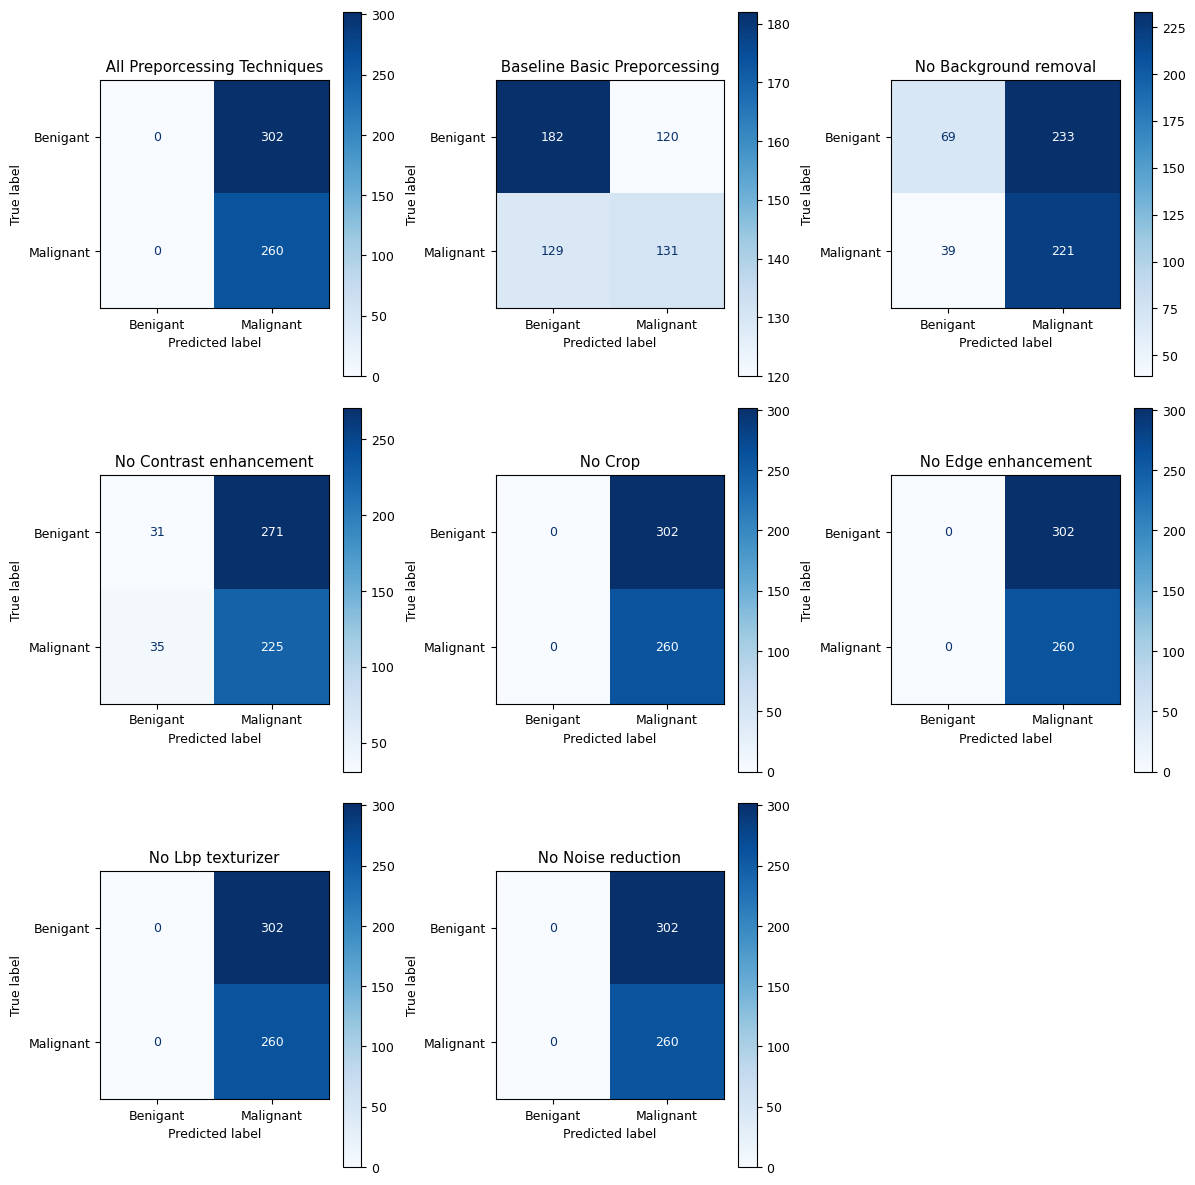

In [4]:
# vusualize confusion matrix
vis_BG.confusion_matrices(models_data_BG, models_data_BG.keys(), classes=classes)

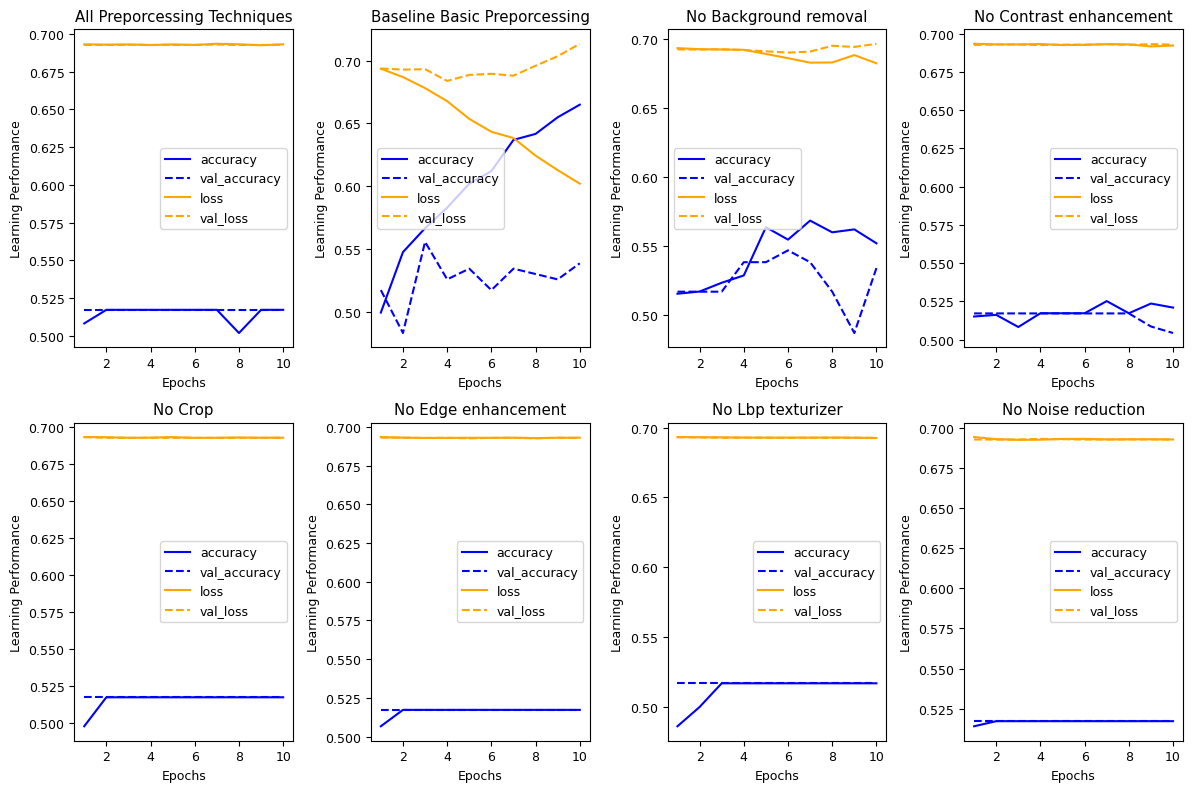

In [5]:
# vusualize learning curves plots 
vis_BG.learning_curves(models_data_BG, display_models_names, ["accuracy", "loss"], ["blue", "orange"])

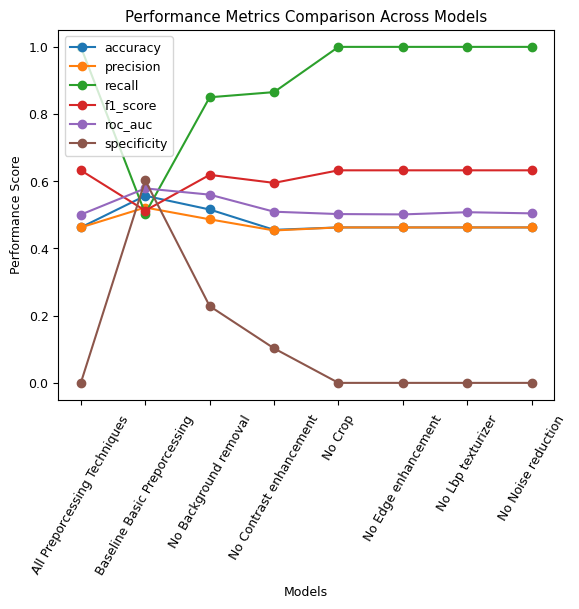

In [6]:
vis_BG.line_plot(models_data_BG, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

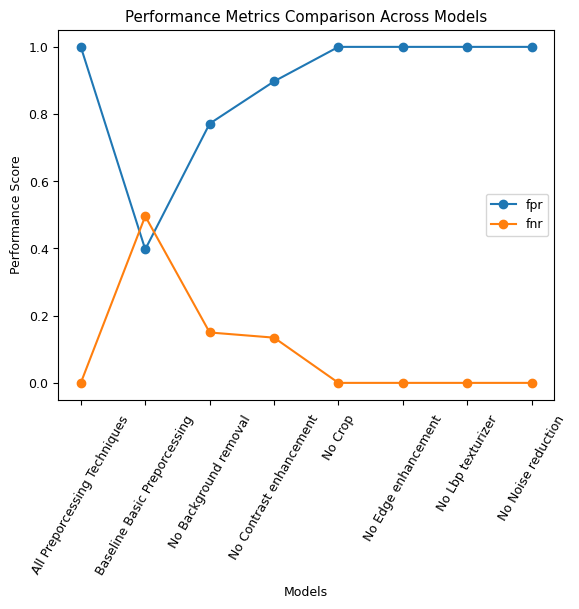

In [7]:
vis_BG.line_plot(models_data_BG, display_models_names, ["fpr", "fnr"])

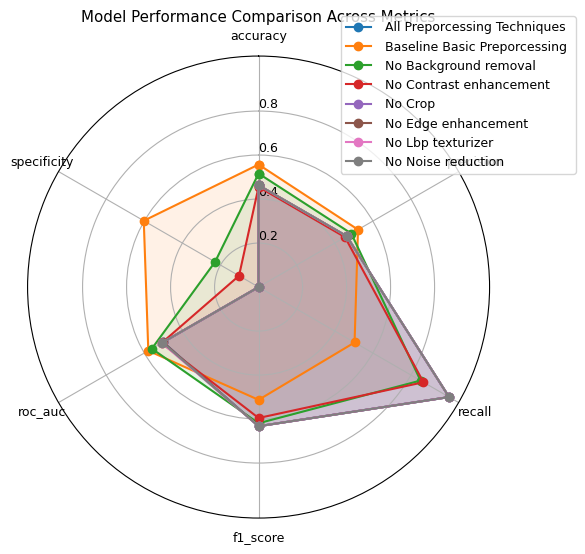

In [8]:
vis_BG.radar_chart(models_data_BG, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

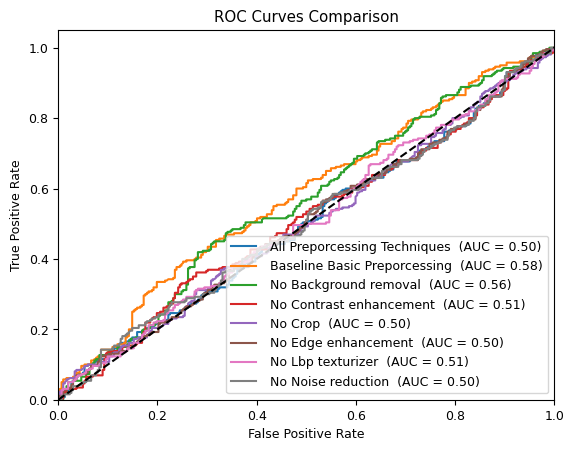

In [9]:
vis_BG.ROC_curve(models_data_BG, display_models_names)

### Baseline model with Image tf.Dataset Generator
This models uses the custom CNN with 10 epochs and the tf.Dataset image iterator  

In [27]:
# runs baseline model with an image dataset generator 
run_model((train_data, val_data, test_data), 
          techniques_groups, 
          project_phase="P2",
          iteration=1,
          with_preprocess=False, 
          epochs=10, 
          change="Baseline(tf.Dataset)")

Training Custom10 - Baseline Basic Preporcessing - Baseline(tf.Dataset)


/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5474 - loss: 0.6913 - val_accuracy: 0.5427 - val_loss: 0.6911
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5803 - loss: 0.6804 - val_accuracy: 0.5171 - val_loss: 0.6919
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5785 - loss: 0.6751 - val_accuracy: 0.5128 - val_loss: 0.6911
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5962 - loss: 0.6688 - val_accuracy: 0.5085 - val_loss: 0.6884
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6026 - loss: 0.6611 - val_accuracy: 0.5299 - val_loss: 0.6852
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6129 - loss: 0.6509 - val_accuracy: 0.5128 - val_loss: 0.6822
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6276 - loss: 0.6400 - val_accuracy: 0.5256 - val_loss: 0.6819
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6414 - loss: 0.6278 - val_accuracy: 0.5427 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5057 - loss: 0.6980 - val_accuracy: 0.5171 - val_loss: 0.6949
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5172 - loss: 0.6917 - val_accuracy: 0.5171 - val_loss: 0.6962
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5338 - loss: 0.6907 - val_accuracy: 0.4957 - val_loss: 0.6975
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5543 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6986
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5520 - loss: 0.6885 - val_accuracy: 0.5000 - val_loss: 0.6995
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5586 - loss: 0.6868 - val_accuracy: 0.4957 - val_loss: 0.7001
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5609 - loss: 0.6846 - val_accuracy: 0.5128 - val_loss: 0.7009
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5660 - loss: 0.6818 - val_accuracy: 0.5000 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5246 - loss: 0.6945 - val_accuracy: 0.5342 - val_loss: 0.6907
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5439 - loss: 0.6876 - val_accuracy: 0.5598 - val_loss: 0.6896
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5503 - loss: 0.6867 - val_accuracy: 0.5470 - val_loss: 0.6891
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5390 - loss: 0.6856 - val_accuracy: 0.5427 - val_loss: 0.6898
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5513 - loss: 0.6844 - val_accuracy: 0.5470 - val_loss: 0.6907
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5518 - loss: 0.6832 - val_accuracy: 0.5641 - val_loss: 0.6921
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5455 - loss: 0.6812 - val_accuracy: 0.5556 - val_loss: 0.6950
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5583 - loss: 0.6788 - val_accuracy: 0.5641 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5318 - loss: 0.6932 - val_accuracy: 0.5385 - val_loss: 0.6857
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5766 - loss: 0.6834 - val_accuracy: 0.5342 - val_loss: 0.6867
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5761 - loss: 0.6820 - val_accuracy: 0.5342 - val_loss: 0.6877
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5716 - loss: 0.6809 - val_accuracy: 0.5342 - val_loss: 0.6893
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5739 - loss: 0.6796 - val_accuracy: 0.5342 - val_loss: 0.6907
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5653 - loss: 0.6785 - val_accuracy: 0.5256 - val_loss: 0.6930
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5624 - loss: 0.6768 - val_accuracy: 0.5470 - val_loss: 0.6960
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5651 - loss: 0.6764 - val_accuracy: 0.5427 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5178 - loss: 0.6962 - val_accuracy: 0.5128 - val_loss: 0.6938
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5362 - loss: 0.6903 - val_accuracy: 0.5043 - val_loss: 0.6940
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5590 - loss: 0.6884 - val_accuracy: 0.5556 - val_loss: 0.6939
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5621 - loss: 0.6861 - val_accuracy: 0.5513 - val_loss: 0.6936
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5545 - loss: 0.6834 - val_accuracy: 0.5342 - val_loss: 0.6938
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5664 - loss: 0.6803 - val_accuracy: 0.5214 - val_loss: 0.6942
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5738 - loss: 0.6774 - val_accuracy: 0.5256 - val_loss: 0.6948
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5750 - loss: 0.6739 - val_accuracy: 0.5299 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.4918 - loss: 0.6982 - val_accuracy: 0.5171 - val_loss: 0.6946
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5275 - loss: 0.6918 - val_accuracy: 0.5128 - val_loss: 0.6957
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5292 - loss: 0.6906 - val_accuracy: 0.5128 - val_loss: 0.6969
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5540 - loss: 0.6894 - val_accuracy: 0.5043 - val_loss: 0.6975
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5620 - loss: 0.6875 - val_accuracy: 0.5085 - val_loss: 0.6982
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5576 - loss: 0.6852 - val_accuracy: 0.5043 - val_loss: 0.6988
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5689 - loss: 0.6822 - val_accuracy: 0.5342 - val_loss: 0.7000
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5770 - loss: 0.6795 - val_accuracy: 0.5171 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5079 - loss: 0.6980 - val_accuracy: 0.5171 - val_loss: 0.6941
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5168 - loss: 0.6918 - val_accuracy: 0.5128 - val_loss: 0.6951
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5234 - loss: 0.6908 - val_accuracy: 0.4872 - val_loss: 0.6962
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5508 - loss: 0.6899 - val_accuracy: 0.4915 - val_loss: 0.6968
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5483 - loss: 0.6884 - val_accuracy: 0.5000 - val_loss: 0.6967
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5563 - loss: 0.6863 - val_accuracy: 0.5043 - val_loss: 0.6964
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5664 - loss: 0.6829 - val_accuracy: 0.5171 - val_loss: 0.6963
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5686 - loss: 0.6802 - val_accuracy: 0.4872 - v

/mnt/c/Users/mayra/OneDrive/Documents/MayraCSc/AI/DQNvenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       115,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,873 (812.00 KB)

 Trainable params: 207,873 (812.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5088 - loss: 0.6946 - val_accuracy: 0.4829 - val_loss: 0.6942
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5673 - loss: 0.6871 - val_accuracy: 0.5043 - val_loss: 0.6941
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5787 - loss: 0.6830 - val_accuracy: 0.5128 - val_loss: 0.6968
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5854 - loss: 0.6772 - val_accuracy: 0.4872 - val_loss: 0.7019
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5860 - loss: 0.6704 - val_accuracy: 0.4957 - val_loss: 0.7081
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5982 - loss: 0.6617 - val_accuracy: 0.4829 - val_loss: 0.7143
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6207 - loss: 0.6506 - val_accuracy: 0.5000 - val_loss: 0.7216
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6384 - loss: 0.6366 - val_accuracy: 0.4615 - v

#### Visulaizing
The following are some visualizations to compare the model outputs for each techniques

In [28]:
# gets data based from models using tf.Data.Dataset
out_dir = "Outputs/Iteration1"
str_filter_BD = "baseline(tf.dataset)"

# initialize visualization instance
vis_BD = Visualization(out_directory=out_dir, identifier=1, str_filter=str_filter_BD)

# loads data 
models_data_BD = vis_BD.load_files()

# gets names of models
display_models_names = models_data_BD.keys()

# classes
classes = ['Benigant', 'Malignant']

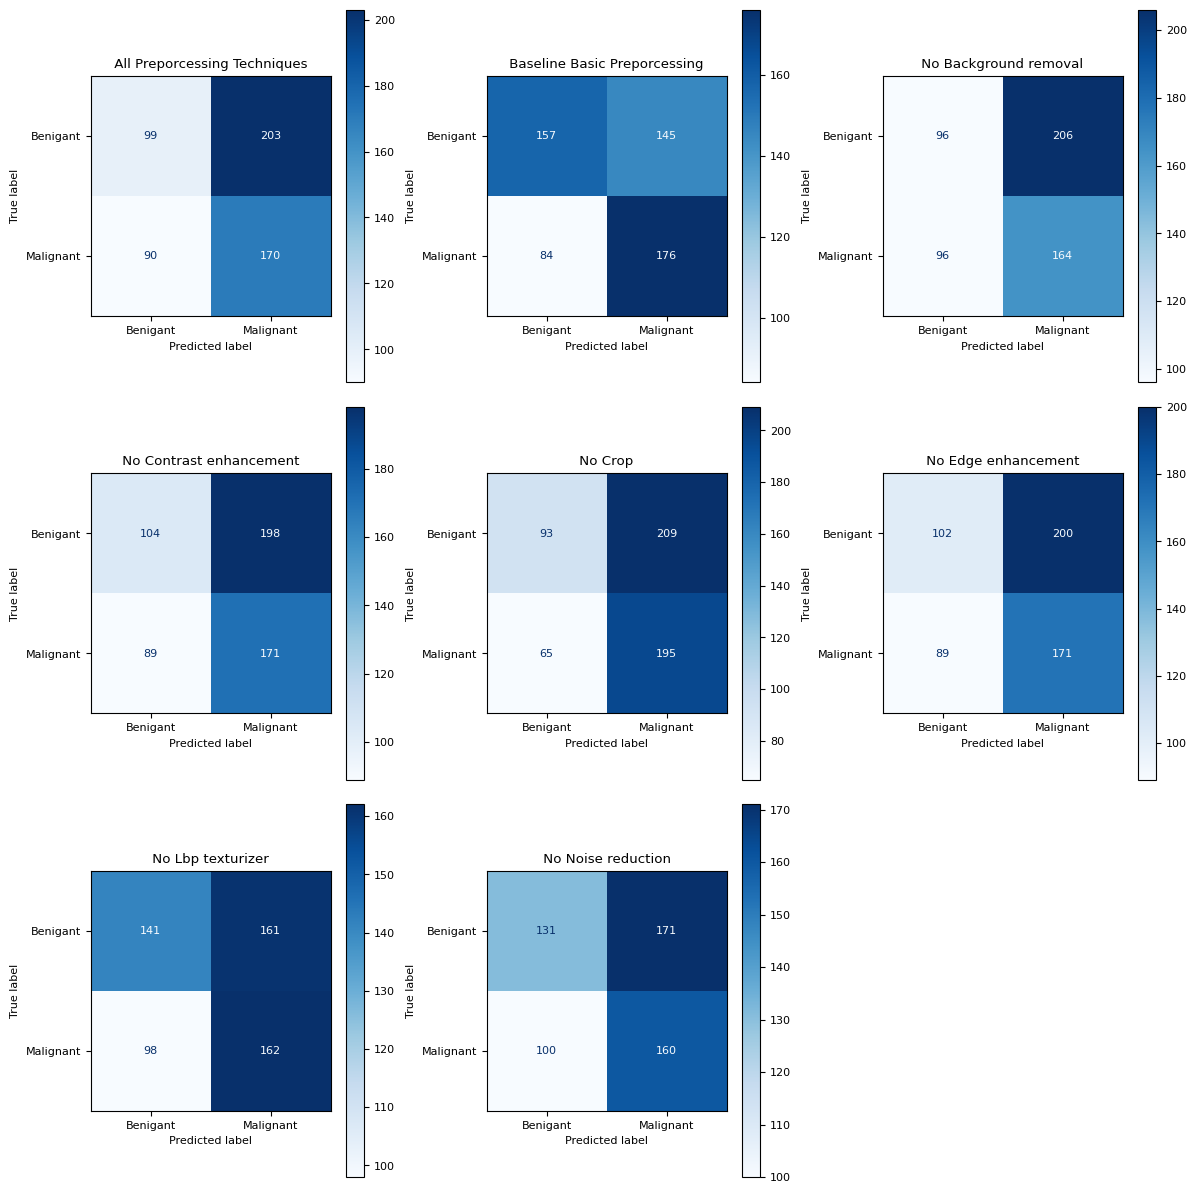

In [29]:
# vusualize confusion matrix
vis_BD.confusion_matrices(models_data_BD, models_data_BD.keys(), classes=classes)

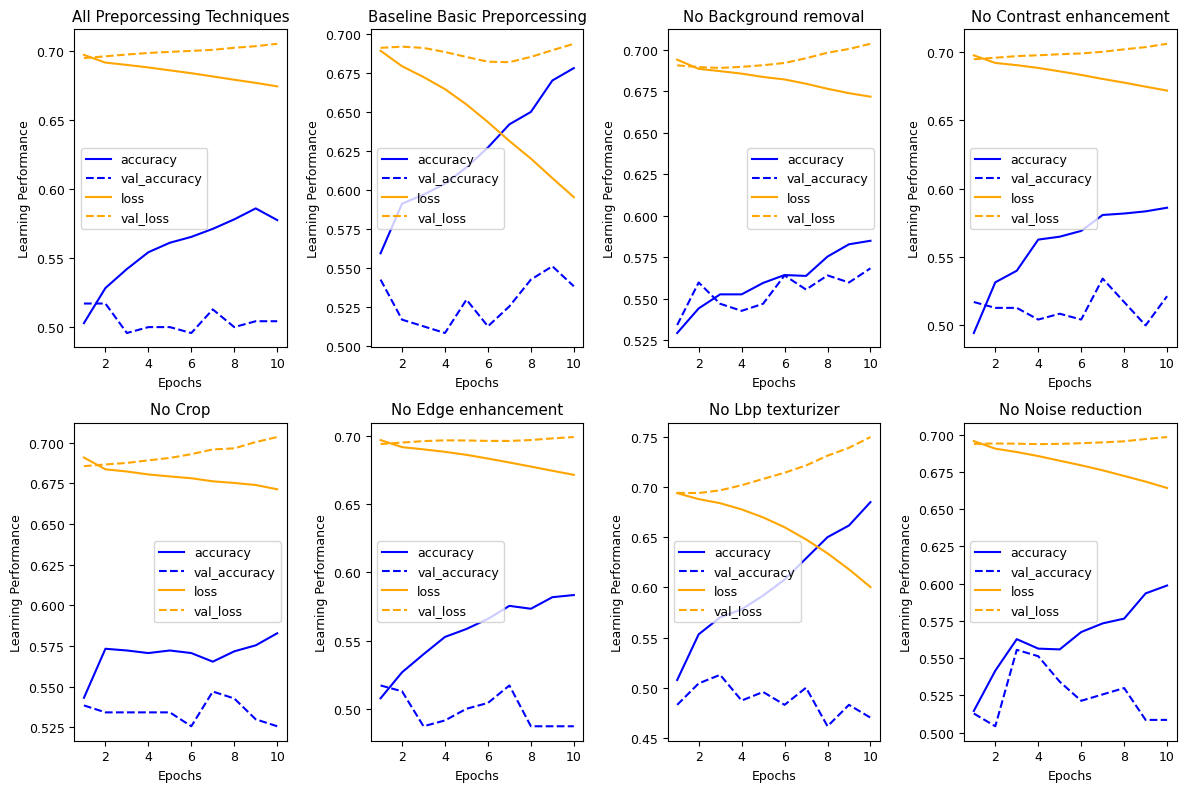

In [30]:
# vusualize learning curves plots 
vis_BD.learning_curves(models_data_BD, display_models_names, ["accuracy", "loss"], ["blue", "orange"])

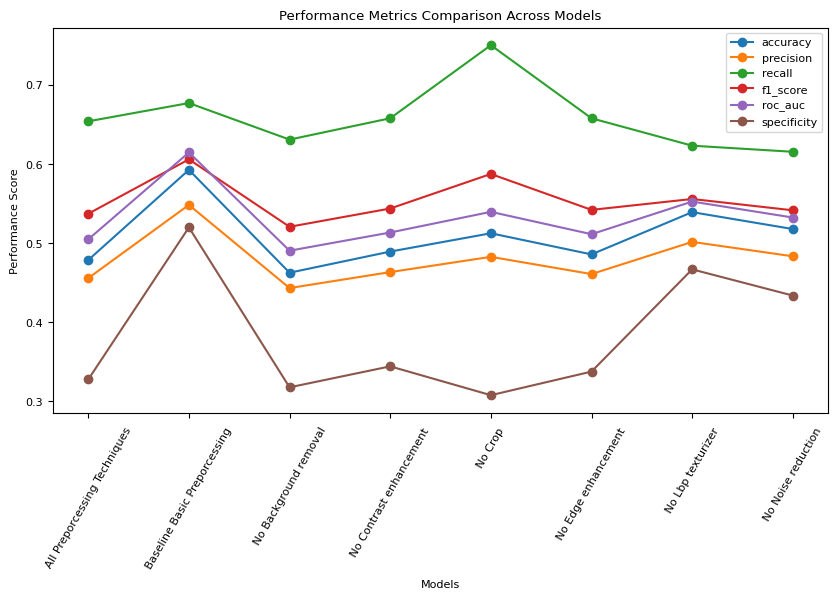

In [31]:
vis_BD.line_plot(models_data_BD, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

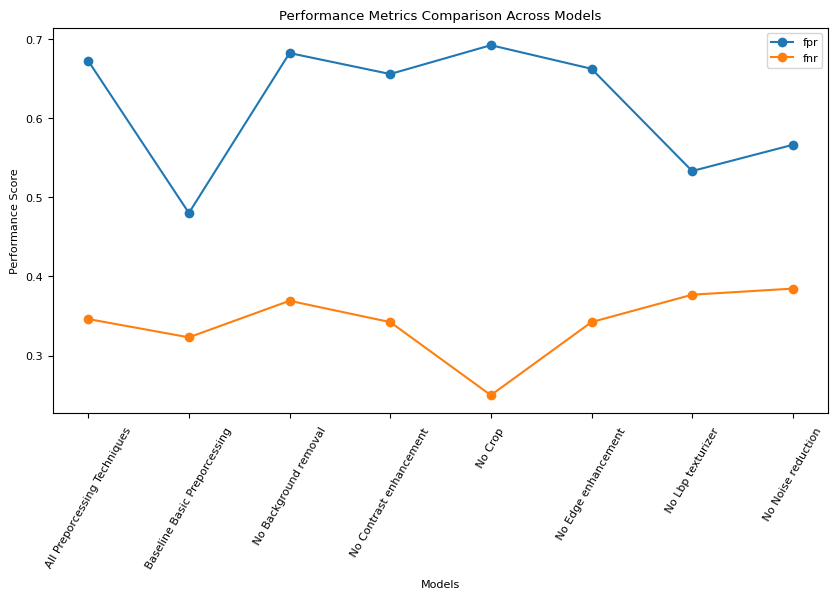

In [32]:
vis_BD.line_plot(models_data_BD, display_models_names, ["fpr", "fnr"])

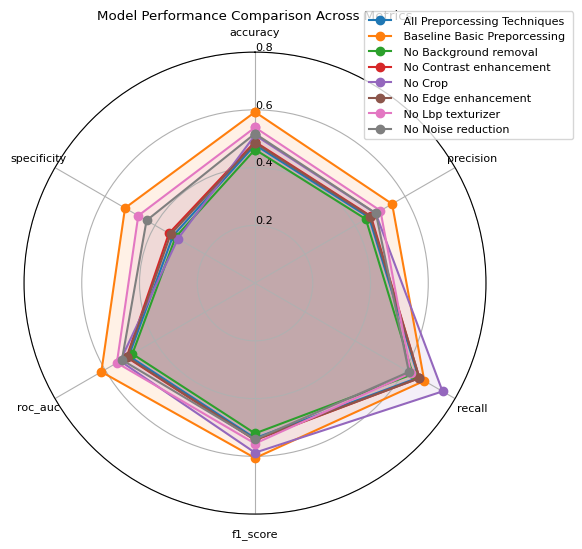

In [33]:
vis_BD.radar_chart(models_data_BD, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

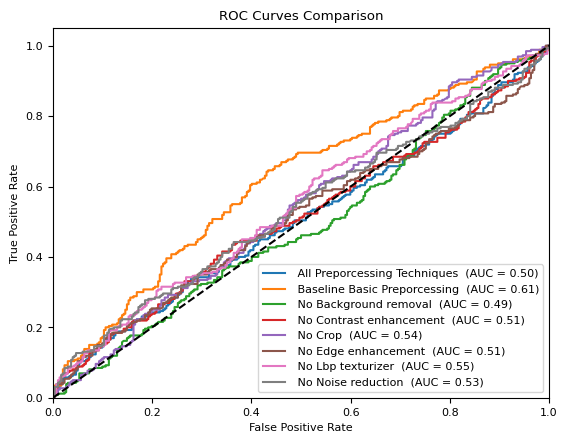

In [34]:
vis_BD.ROC_curve(models_data_BD, display_models_names)